In [4]:
#   ██████╗ ██████╗ ██╗   ██╗██╗██████╗        ██╗ █████╗ 
#  ██╔════╝██╔═══██╗██║   ██║██║██╔══██╗      ███║██╔══██╗
#  ██║     ██║   ██║██║   ██║██║██║  ██║█████╗╚██║╚██████║
#  ██║     ██║   ██║╚██╗ ██╔╝██║██║  ██║╚════╝ ██║ ╚═══██║
#  ╚██████╗╚██████╔╝ ╚████╔╝ ██║██████╔╝       ██║ █████╔╝
#   ╚═════╝ ╚═════╝   ╚═══╝  ╚═╝╚═════╝        ╚═╝ ╚════╝ 
#                                                         
# This machine learning pipeline is a fork from BRHIM - Base de Registros Hospitalares para Informações e Metadados - By: Vaz, Dora, Lamb e Camey (work in progress to be published in 2021)
# This COVID-19 analysis was done by a multidisciplinary team from Hospital de Clínicas de Porto Alegre, that have promoted a permanent data science study group.
# Contact to authors:  mhbarbian@gmail.com , vhirakata@hcpa.edu.br, tvaz@hcpa.edu.br , scamey@hcpa.edu.br
#
#         DATA CULTURE              // ______________________________________________
#          SCIENCE                 // _____________________________________________
#            MULTIDISCIPLINARITY  // ____________________________________________
#
#=
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns 
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso,  LogisticRegression, LinearRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,f1_score, classification_report, confusion_matrix, roc_auc_score)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold




pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
np.random.seed(0)

plt.figure(figsize=(22,8))
plt.rc("font", size=11)
sns.set_style("darkgrid")
sns.set(color_codes=True)
paleta_cores = sns.color_palette(["#8f8f8b","#fc0303"])

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'uint8']
quali = ['object']

"""
from google.colab import drive
drive.mount('/content/gdrive')
with open('/content/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello ')
!cat /content/gdrive/My\ Drive/foo.txt
!ls -l
"""


"\nfrom google.colab import drive\ndrive.mount('/content/gdrive')\nTESTA CONEXÃO, CRIANDO UM ARQUIVO NO DRIVE E MOSTRANDO O RESULTADO \nwith open('/content/gdrive/My Drive/foo.txt', 'w') as f:\n  f.write('Hello ')\n!cat /content/gdrive/My\\ Drive/foo.txt\n!ls -l\n"

<Figure size 1584x576 with 0 Axes>

In [0]:
df=pd.read_csv('brhim_train_set.csv', encoding="utf-8")
df['s'] = 'train_test'
print (df.shape)

df_val=pd.read_csv('brhim_validation_set.csv', encoding="utf-8")
df_val['s'] = 'validation'
print (df_val.shape)

df_comp=pd.read_csv('brhim_competition_set.csv', encoding="utf-8")
df_comp['s'] = 'competition'
print (df_comp.shape)

#df_mortalidade = pd.concat([df, df_val, df_comp], ignore_index=True)
df_mortalidade = pd.concat([df, df_val, df_comp]).copy()
y= df_mortalidade['OBITO_HOSPITAL'].astype('category')
y = pd.concat([y, df_mortalidade['s'].astype('category')]  , axis=1) 
df_descritiva = df_mortalidade.copy()

del df_mortalidade['OBITO_HOSPITAL']
print (df_mortalidade.shape)

In [0]:
print('Quali work')

quali_columns = list(df_duke.select_dtypes(include=quali).columns)
print(quali_columns)
quali_columns.remove('IDs')
#quali_columns.remove('PACIENTE')
#quali_columns.remove('DTHR_INICIO_parsed')
#quali_columns.remove('s')
print(quali_columns)

for col in quali_columns:
     df_duke[col] = df_duke[col].astype('category')
     df_duke[col] = df_duke[col].cat.add_categories('DESCONHECIDO')
     df_duke[col].fillna('DESCONHECIDO', inplace =True) 

df_duke = df_duke.round(decimals=3)
print(df_duke.info())

print('Cleanning ... remove variáveis duplicadas e vazias')
print(df_duke.shape)
df_duke = df_duke.drop_duplicates()
df_duke.dropna(axis=1, how='all', thresh=None, subset=None, inplace=True)
print(df_duke.shape)

print('CONSTANTS ... Cleanning')
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(df_duke.select_dtypes(include=numerics))
len(df_duke.select_dtypes(include=numerics).columns[constant_filter.get_support()])
constant_columns = [column for column in df_duke.select_dtypes(include=numerics).columns
                    if column not in df_duke.select_dtypes(include=numerics).columns[constant_filter.get_support()]]
df_duke.drop(labels=constant_columns, axis=1, inplace=True)
print(constant_columns)

print('QUASI-CONSTANTS ... Cleanning')
qconstant_filter = VarianceThreshold(threshold=0.01)
qconstant_filter.fit(df_duke.select_dtypes(include=numerics))
len(df_duke.select_dtypes(include=numerics).columns[qconstant_filter.get_support()])
qconstant_columns = [column for column in df_duke.select_dtypes(include=numerics).columns
                    if column not in df_duke.select_dtypes(include=numerics).columns[qconstant_filter.get_support()]]
df_duke.drop(labels=qconstant_columns, axis=1, inplace=True)
print(qconstant_columns)

print('CORRELATIONS ... Cleanning')
correlated_features2 = set()
correlation_matrix2 = df_duke.select_dtypes(include=numerics).corr()
for i in range(len(correlation_matrix2.columns)):
    for j in range(i):
        if abs(correlation_matrix2.iloc[i, j]) > 0.9999:
            colname2 = correlation_matrix2.columns[i]
            correlated_features2.add(colname2)
df_duke.drop(labels=correlated_features2, axis=1, inplace=True)
print(correlated_features2)

print("Usefull information: ")
print(df_duke.info())

print("Transform features: ")

df_dummie = df_duke
df_dummie = df_dummie.drop(columns=['PACIENTE','ATENDIMENTO','DTHR_INICIO_parsed','s'])
df_dummie = pd.get_dummies(df_dummie.select_dtypes(include=['category']),dummy_na=False, prefix='d')
df_duke = pd.concat([df_duke, df_dummie.fillna(value=0)], axis=1) 

print("Usefull features: ")
print(df_mortalidade.dtypes)
#print(df_duke.info())

print('Still Missing?')
print(df_duke.select_dtypes(include=numerics).isnull().sum().sum())
print(df_duke.select_dtypes(include=['category']).isnull().sum().sum())
print(df_duke.info())

#TODO: To remove OUTLIERS? <- TEST








QUALITATIVAS ... ajustando categorias
['SEXO', 'ESCOLARIDADE', 'COR_DA_PELE', 'ESTADO_CIVIL', 'LOCAL_ADMISSAO', 'CLINICA_INTERNACAO', 'DIALISE_48HRS_IND', 'RADIOTERAPIA_48HRS_IND', 'QUIMIOTERAPIA_48HRS_IND', 'TRANSF_CTI_48HRS_IND', 'EMERGENCIA_GRAVIDADE', 'EMERGENCIA_SCORE_COR', 'INFECCAO_COMUN_PNM_48HRS_IND', 'INFECCAO_COMUN_URI_48HRS_IND', 'INFECCAO_COMUN_SIS_48HRS_IND', 'INFECCAO_COMUN_OUTRA_48HRS_IND', 'ESCARRO_BACTERIOSCÓPICO_BACTERIA_IND', 'LIQUOR_BACTERIOSCÓPICO_BACTERIA_IND', 'ASCITE_BACTERIOSCÓPICO_BACTERIA_IND', 'ESCARRO_BACTERIOLOGICO_BACTERIA_IND', 'LIQUOR_BACTERIOLOGICO_BACTERIA_IND', 'ASCITE_BACTERIOLOGICO_BACTERIA_IND', 'ABSCESSO_BACTERIOLOGICO_BACTERIA_IND', 'SECREÇÃO_BACTERIOLOGICO_BACTERIA_IND', 'PONTA_CATETER_BACTERIOLOGICO_BACTERIA_IND', 'SANGUE_LEUCOCITOS_MAX_CAT', 'SANGUE_LEUCOCITOS_MIN_CAT', 'SANGUE_BILIRRUBINA_TOTAL_MAX_CAT', 'SANGUE_BILIRRUBINA_TOTAL_MIN_CAT', 'SANGUE_CONTAGEM_DE_PLAQUETAS_MAX_CAT', 'SANGUE_CONTAGEM_DE_PLAQUETAS_MIN_CAT', 'SANGUE_CONTAGEM_DE_PL

In [0]:
print('train test preparation')
X_train_test = df_duke[df_duke['s'] == 'train_test' ]
y_train_test = y[y['s'] == 'train_test' ]
del y_train_test['s']
y_train_test = y_train_test.iloc[:,0]
#print(X_train_test.dtypes)
#print(y_train_test.dtypes)
#prepare validation set
X_validation = df_duke[df_duke['s'] == 'validation' ]
y_validation = y[y['s'] == 'validation' ]
del y_validation['s']
y_validation = y_validation.iloc[:,0]
#print(X_validation.dtypes)
#print(y_validation.dtypes)
#prepare competition set
X_competition = df_duke[df_duke['s'] == 'competition' ]
y_competition = y[y['s'] == 'competition' ]
del y_competition['s']
y_competition = y_competition.iloc[:,0]
#print(X_competition.dtypes)
#print(y_competition.dtypes)

X_train,X_test,y_train,y_test = train_test_split(X_train_test, y_train_test , test_size=0.25,random_state=0, stratify=y_train_test)

print('  X_train  x_test: ', len(X_train), len(X_test))
print('  y_train  y_test: ', len(y_train), len(y_test))
print('  X_validation  y_validation: ', len(X_validation), len(y_validation))
print('  X_competition  y_competition: ', len(X_competition), len(y_competition))

print('Imputa média de cada coluna, primeiro em train depois em test')
X_train =    X_train.select_dtypes(include=numerics).apply(lambda x: x.fillna(x.mean())) 
X_test = X_test.select_dtypes(include=numerics).apply(lambda x: x.fillna(x.mean())) 
X_validation = X_validation.select_dtypes(include=numerics).apply(lambda x: x.fillna(x.mean())) 
X_competition = X_competition.select_dtypes(include=numerics).apply(lambda x: x.fillna(x.mean())) 

X_train = X_train.round(decimals=3)
X_test = X_test.round(decimals=3)
X_validation = X_validation.round(decimals=3)
X_competition = X_competition.round(decimals=3)

print('Imputa 0 em VAR vazia')
X_train = X_train.select_dtypes(include=numerics).apply(lambda x: x.fillna(0)) 
X_test = X_test.select_dtypes(include=numerics).apply(lambda x: x.fillna(0)) 
X_validation = X_validation.select_dtypes(include=numerics).apply(lambda x: x.fillna(0)) 
X_competition = X_competition.select_dtypes(include=numerics).apply(lambda x: x.fillna(0)) 

print('Something Missing after split?')
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())
print(X_validation.isnull().sum().sum())
print(X_competition.isnull().sum().sum())

X_train.loc[:, X_train.isna().any()] 

PREPROCESSAMEMTO SEPARADO EM TREINAMENTO E TESTE... imputando
  X_train  x_test:  12226 4076
  y_train  y_test:  12226 4076
  X_validation  y_validation:  16414 16414
  X_competition  y_competition:  100 100
Imputa média de cada coluna, primeiro em train depois em test
Imputa 0 em VAR vazia
ALGO FALTANDO?
0
0
0
0


""
11011
3927
1191
5431
2936
...
16146
11369
11983
3079


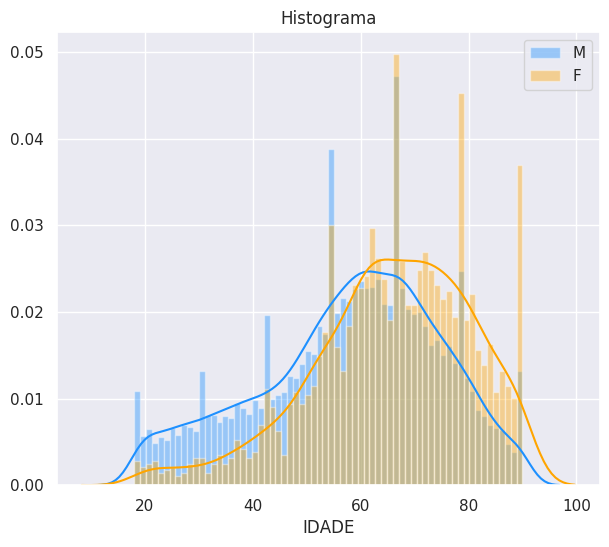

In [0]:

plt.subplots(figsize=(7,6), dpi=100)
df_count_distinct = df_descritiva.groupby('IDADE')['PACIENTE'].nunique()
df_count_distinct.nunique()

sns.distplot( df_descritiva.loc[df_descritiva.OBITO_HOSPITAL=='N', "IDADE"] , color="dodgerblue", label="M", bins=df_count_distinct.nunique())
sns.distplot( df_descritiva.loc[df_descritiva.OBITO_HOSPITAL=='Y', "IDADE"] , color="orange", label="F", bins=df_count_distinct.nunique())
plt.title('Histograma')
plt.legend();

In [6]:
#Classifier Showdown for COVID-19 patients 

models = []
#models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('QDA', QuadraticDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('NVC', NuSVC(probability=True)))
#models.append(('ABC', AdaBoostClassifier()))
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('RF', RandomForestClassifier()))
#models.append(('RFb', RandomForestClassifier(class_weight='balanced')))
#models.append(('RF10', RandomForestClassifier(n_estimators=10)))
#models.append(('RF50', RandomForestClassifier(n_estimators=50)))
#models.append(('RF100', RandomForestClassifier(n_estimators=100)))
#models.append(('RF150', RandomForestClassifier(n_estimators=150,  max_features=3)))
#models.append(('RF150d20', RandomForestClassifier(n_estimators=150, max_depth=20)))
#models.append(('RF150d200', RandomForestClassifier(n_estimators=150, max_depth=200)))
#models.append(('RF500', RandomForestClassifier(n_estimators=500)))
#models.append(('RF10k', RandomForestClassifier(n_estimators=10000)))
#models.append(('RF20k', RandomForestClassifier(n_estimators=20000)))
models.append(('GBC', GradientBoostingClassifier()))
#models.append(('GBC50', GradientBoostingClassifier(n_estimators=50, max_depth=3)))
#models.append(('GBC150', GradientBoostingClassifier(n_estimators=150, max_depth=3)))
#models.append(('GBC505', GradientBoostingClassifier(n_estimators=50, max_depth=2)))
#models.append(('GBC1505', GradientBoostingClassifier(n_estimators=150, max_depth=2)))
#original_params = {'n_estimators': 1000, 'max_leaf_nodes': 4, 'max_depth': None, 'random_state': 2, 'min_samples_split': 5}
#params = dict(original_params)
#params.update(setting)
#models.append(('GBC2', GradientBoostingClassifier(**params)))

#clf__turbo = GradientBoostingClassifier(**params)
#clf__turbo.fit(X_train, y_train)

#models.append(('GBC10k - CHAMPION', GradientBoostingClassifier(n_estimators=10000)))
#models.append(('RF1k - GRID CANDIDATE', RandomForestClassifier(n_estimators=1000, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8)))


#GRID SEARCH CHAMPION 04/03/2020
#[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 667.6min finished
#{'bootstrap': True,
# 'max_depth': 100,
# 'max_features': 3,
# 'min_samples_leaf': 3,
# 'min_samples_split': 8,
# 'n_estimators': 1000}



# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.StratifiedKFold(n_splits=10)
 	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# boxplot comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

NameError: ignored

VALIDACAO
Acuracia:  0.9218959424881199
F1:  0.9090110758347756
Sensibilidade:  0.9218959424881199
Especificidade:  0.9047638852132045
AUC-ROC:  0.8463038234803446
VALIDACAO ISO
Acuracia:  0.9201291580358231
F1:  0.9109597272669955
Sensibilidade:  0.9201291580358231
Especificidade:  0.9062398173073388
AUC-ROC:  0.8526605400490646
VALIDACAO SIG
Acuracia:  0.9200073108322164
F1:  0.9118697984426072
Sensibilidade:  0.9200073108322164
Especificidade:  0.9073199245160269
AUC-ROC:  0.8528766067509075


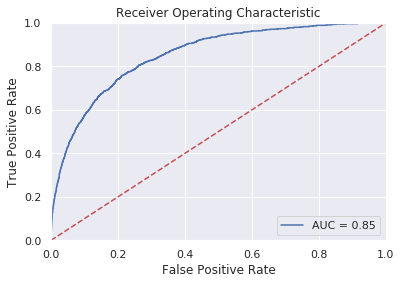

Best threshold ROC-AUC: 0.17%
[False False False ... False False False]
--- 189.91336512565613 seconds ---


In [0]:
#APRIMORA PERFORMANCE DO CAMPEAO
from sklearn.preprocessing import label_binarize

import time
start_time = time.time()

for name, model in models:
  if name =='GBC':  clf_champ = model

clf_champ.fit(X_train,y_train)

#CALIBRAGEM
calibrator_iso = CalibratedClassifierCV(clf_champ, cv=10,method='isotonic')
calibrator_iso.fit(X_train, y_train)

calibrator_sig = CalibratedClassifierCV(clf_champ, cv=10,method='sigmoid')
calibrator_sig.fit(X_train, y_train)


# VALIDACAO
y_validation_prob=clf_champ.predict_proba(X_validation)
y_validation_pred=clf_champ.predict(X_validation)
y_validation_iso_prob=calibrator_iso.predict_proba(X_validation)
y_validation_iso_pred=calibrator_iso.predict(X_validation)
y_validation_sig_prob=calibrator_sig.predict_proba(X_validation)
y_validation_sig_pred=calibrator_sig.predict(X_validation)



print("VALIDACAO")
print('Acuracia: ', metrics.accuracy_score(y_validation, y_validation_pred))
print('F1: ',f1_score(y_validation, y_validation_pred, average='weighted'))
print('Sensibilidade: ',recall_score(y_validation, y_validation_pred, average='weighted'))
print('Especificidade: ',precision_score(y_validation, y_validation_pred, average='weighted'))
print('AUC-ROC: ',roc_auc_score(y_validation, y_validation_prob[:,1]))

print("VALIDACAO ISO")
print('Acuracia: ', metrics.accuracy_score(y_validation, y_validation_iso_pred))
print('F1: ',f1_score(y_validation, y_validation_iso_pred, average='weighted'))
print('Sensibilidade: ',recall_score(y_validation, y_validation_iso_pred, average='weighted'))
print('Especificidade: ',precision_score(y_validation, y_validation_iso_pred, average='weighted'))
print('AUC-ROC: ',roc_auc_score(y_validation, y_validation_iso_prob[:,1]))

print("VALIDACAO SIG")
print('Acuracia: ', metrics.accuracy_score(y_validation, y_validation_sig_pred))
print('F1: ',f1_score(y_validation, y_validation_sig_pred, average='weighted'))
print('Sensibilidade: ',recall_score(y_validation, y_validation_sig_pred, average='weighted'))
print('Especificidade: ',precision_score(y_validation, y_validation_sig_pred, average='weighted'))
print('AUC-ROC: ',roc_auc_score(y_validation, y_validation_sig_prob[:,1]))




fpr, tpr, threshold = metrics.roc_curve(y_validation, y_validation_sig_prob[:,1],pos_label='Y')
roc_auc = metrics.auc(fpr, tpr)



# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#OPTIMIZA TRESHOLD



#best_threshold = threshold[np.argmax(tpr + (1-fpr))]  
best_threshold_especificidade = threshold[np.argmax((1-fpr))]  
#best_threshold = threshold[np.argmax(1-(1-tpr))]  
best_threshold = threshold[np.argmax(tpr-fpr)]  

y_validation_pred_treshold = y_validation_prob[:,1] >= best_threshold
y_validation_iso_pred_treshold = y_validation_iso_prob[:,1] >= best_threshold
y_validation_sig_pred_treshold = y_validation_sig_prob[:,1] >= best_threshold

print("Best threshold ROC-AUC: %.2f%%" % (round(best_threshold, 3)))     
print(y_validation_pred_treshold)

#TODO
#confusion_matrix_treshold = pd.crosstab(y_test, y_pred_treshold[:,1], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_validation = pd.crosstab(y_validation, y_validation_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_treshold= pd.crosstab(y_validation, y_validation_pred_treshold, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_sig = pd.crosstab(y_validation, y_validation_sig_pred_treshold, rownames=['Actual'], colnames=['Predicted'])
confusion_matrixc_iso = pd.crosstab(y_validation, y_validation_iso_pred_treshold, rownames=['Actual'], colnames=['Predicted'])

shodown_end_time = time.time()


print("--- runtime: %s seconds ---" % (time.time() - start_time))



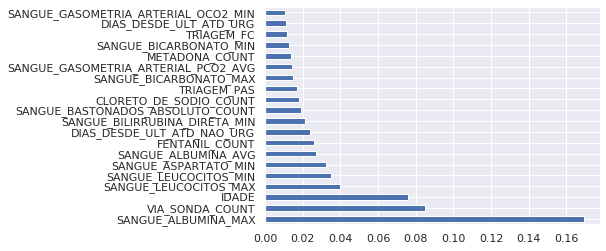

In [0]:
feat_importances = pd.Series(clf_champ.fit(X_train,y_train).feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')


In [0]:

clf_score = brier_score_loss(y_validation, y_validation_prob[:,1], pos_label='Y')
clf_score_iso = brier_score_loss(y_validation, y_validation_iso_prob[:,1], pos_label='Y')
clf_score_sig = brier_score_loss(y_validation, y_validation_sig_prob[:,1], pos_label='Y')

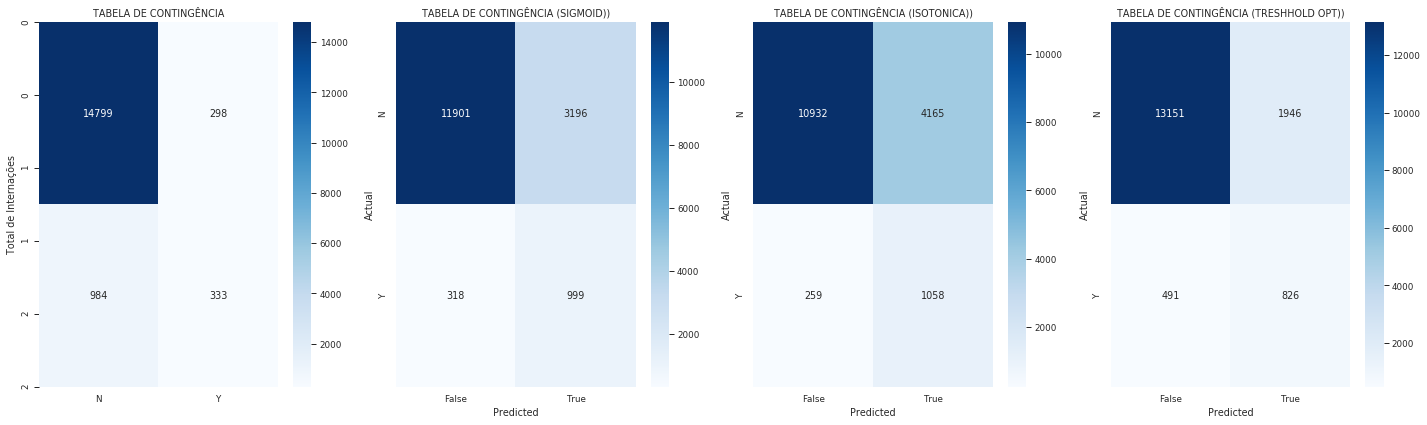

In [0]:
#GRÁFICOS - CONTINGÊNCIA E CALIBRAGEM
#CONFIGURA TAMANHO E ESTILO DO PAINEL ONDE OS GRÁFICOS VÃO SER MONTADOS
plt.figure(figsize=(20,6))
#plt.figure(figsize=(20,6))
plt.rc("font", size=11)
plt.rcParams['font.family'] = "cursive"

sns.set_style("darkgrid")
sns.set(color_codes=True)
sns.set(style="whitegrid", font_scale=0.8)
sns.set_context("paper")


plt.subplot(1, 4, 1)
plt.title('TABELA DE CONTINGÊNCIA')
plt.xlabel('')
g1 = sns.heatmap(confusion_matrix_validation, annot=True,cmap='Blues', fmt='d')
ncount = len(df_mortalidade)
g1.yaxis.tick_left()
g1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x).replace(',','.')))
g1.yaxis.set_label_position('left')
g1.set_ylabel('Total de Internações')
g1.set_xlabel('')

g1.yaxis.set_major_locator(ticker.LinearLocator(6))
#g1.set_ylim(0,50000)


plt.subplot(1, 4, 2)
plt.title('TABELA DE CONTINGÊNCIA (SIGMOID))')
plt.xlabel('')
g2 = sns.heatmap(confusion_matrix_sig, annot=True,cmap='Blues', fmt='d')


plt.subplot(1, 4, 3)
plt.title('TABELA DE CONTINGÊNCIA (ISOTONICA))')
plt.xlabel('')
g3 = sns.heatmap(confusion_matrixc_iso, annot=True,cmap='Blues', fmt='d')

plt.subplot(1, 4, 4)
plt.title('TABELA DE CONTINGÊNCIA (TRESHHOLD OPT))')
plt.xlabel('')
g4 = sns.heatmap(confusion_matrix_treshold, annot=True,cmap='Blues', fmt='d')

plt.tight_layout()
plt.show()




COMPETICAO
Acuracia:  0.9
F1:  0.8885869565217392
Sensibilidade:  0.9
Especificidade:  0.8829787234042553
AUC-ROC:  0.7022222222222223


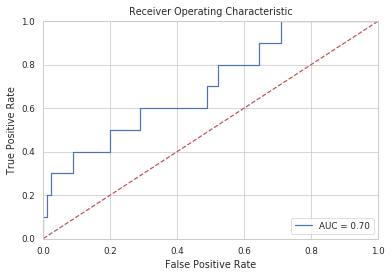

Best threshold ROC-AUC: 0.17%
[False False False False False False  True  True False False  True False
 False False False False False False  True False False  True False False
 False  True False  True False  True  True False False False False False
  True False False False False False False False False False False False
 False  True False False False False False  True  True  True  True  True
 False  True False False  True False  True False False  True False  True
 False False False False False False False False  True False  True False
  True False False False False False False False False False False False
 False  True False False]


[]

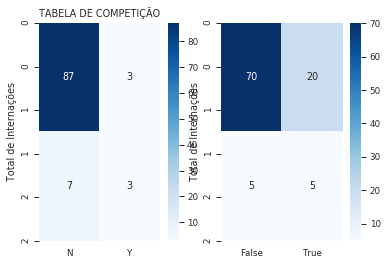

In [0]:
#COMPETITION
from  sklearn.utils.class_weight import compute_sample_weight 
from sklearn.model_selection import KFold

#PREPARA O CAMPEAO COM TODOS OS DADOS DISPONIVEIS
X_champ = pd.concat([X_train, X_test, X_validation])
y_champ = pd.concat([y_train, y_test, y_validation])
#weights = compute_sample_weight(class_weight='balanced', y=y_champ)
#print(weights[0])
#print(weights)
#weights = np.zeros(len(y_champ))
#weights[y_champ == 'N'] = weights[0]
#weights[y_champ == 'Y'] = weights[1]
wb = GradientBoostingClassifier()
#clf = GradientBoostingClassifier(n_estimators=100)
#clf = RandomForestClassifier(n_estimators=100 )
wb.fit(X_champ,y_champ)
#y_pred = clf.predict_proba(X_test)
#print(y_pred[:,1])
#y_pred[:,1]

#CALIBRAGEM
#calibrator_iso = CalibratedClassifierCV(clf, cv=10,method='isotonic')
#calibrator_iso.fit(X_train, y_train)

calibrator_sig = CalibratedClassifierCV(wb, cv=10,method='sigmoid')
champ = calibrator_sig.fit(X_champ, y_champ)


y_competition_prob=champ.predict_proba(X_competition)
y_competition_pred=champ.predict(X_competition)
print("COMPETICAO")
print('Acuracia: ', metrics.accuracy_score(y_competition, y_competition_pred))
print('F1: ',f1_score(y_competition, y_competition_pred, average='weighted'))
print('Sensibilidade: ',recall_score(y_competition, y_competition_pred, average='weighted'))
print('Especificidade: ',precision_score(y_competition, y_competition_pred, average='weighted'))
print('AUC-ROC: ',roc_auc_score(y_competition, y_competition_prob[:,1]))


fpr, tpr, threshold = metrics.roc_curve(y_competition, y_competition_prob[:,1],pos_label='Y')
roc_auc = metrics.auc(fpr, tpr)



# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#OPTIMIZA TRESHOLD
#best_threshold = threshold[np.argmax(tpr + (1-fpr))]  
y_competition_pred_treshold = y_competition_prob[:,1] >= best_threshold

print("Best threshold ROC-AUC: %.2f%%" % (round(best_threshold, 3)))     
print(y_competition_pred_treshold)

#TODO
#confusion_matrix_treshold = pd.crosstab(y_test, y_pred_treshold[:,1], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_competition = pd.crosstab(y_competition, y_competition_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_competition_treshold= pd.crosstab(y_competition, y_competition_pred_treshold, rownames=['Actual'], colnames=['Predicted'])

plt.subplot(1, 2, 1)
plt.title('TABELA DE COMPETIÇÃO')
plt.xlabel('')
g1 = sns.heatmap(confusion_matrix_competition, annot=True,cmap='Blues', fmt='d')
#ncount = len(df_mortalidade)
g1.yaxis.tick_left()
g1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x).replace(',','.')))
g1.yaxis.set_label_position('left')
g1.set_ylabel('Total de Internações')
g1.set_xlabel('')

g1.yaxis.set_major_locator(ticker.LinearLocator(6))
plt.subplot(1, 2, 2)

g2 = sns.heatmap(confusion_matrix_competition_treshold, annot=True,cmap='Blues', fmt='d')
#ncount = len(df_mortalidade)
g2.yaxis.tick_left()
g2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x).replace(',','.')))
g2.yaxis.set_label_position('left')
g2.set_ylabel('Total de Internações')
g2.set_xlabel('')

g2.yaxis.set_major_locator(ticker.LinearLocator(6))
plt.plot()


![alt text](https://)

	Brier: 0.062
	Precision: 0.528


No handles with labels found to put in legend.


	Recall: 0.253
	F1: 0.342



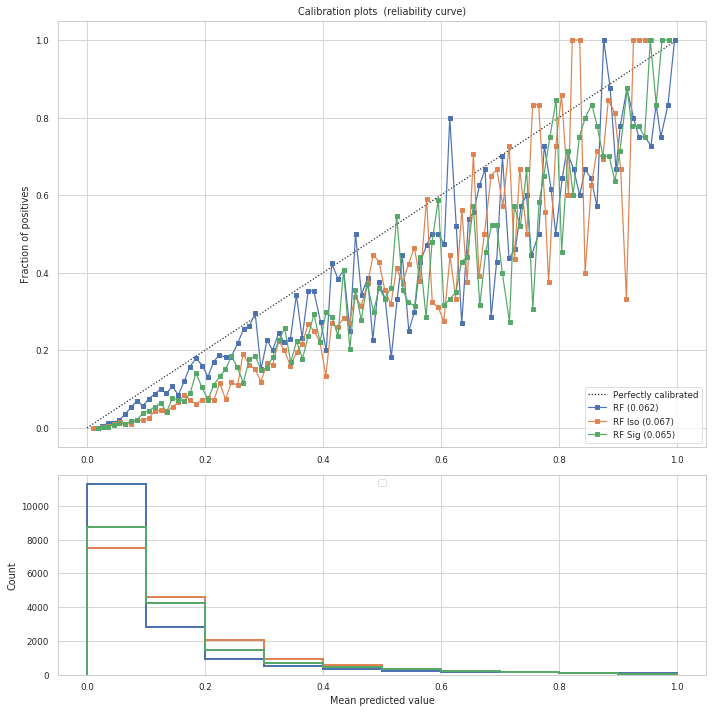

In [0]:
# #############################################################################
# CALIBRAGEM DO MODELO
# #############################################################################
fraction_of_positives, mean_predicted_value = calibration_curve(y_validation, y_validation_prob[:,1], n_bins=100)
fraction_of_positives_iso, mean_predicted_value_iso = calibration_curve(y_validation, y_validation_iso_prob[:,1], n_bins=100)
fraction_of_positives_sig, mean_predicted_value_sig = calibration_curve(y_validation, y_validation_sig_prob[:,1], n_bins=100)


fig = plt.figure(1, figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax1.plot(mean_predicted_value, fraction_of_positives, "s-",label="%s (%1.3f)" % ('RF', clf_score))
ax1.plot(mean_predicted_value_iso, fraction_of_positives_iso, "s-",label="%s (%1.3f)" % ('RF Iso', clf_score_iso))
ax1.plot(mean_predicted_value_sig, fraction_of_positives_sig, "s-",label="%s (%1.3f)" % ('RF Sig', clf_score_sig))


# print("%s:" % name)
print("\tBrier: %1.3f" % (clf_score))
print("\tPrecision: %1.3f" % precision_score(y_validation, y_validation_pred, pos_label='Y'))
print("\tRecall: %1.3f" % recall_score(y_validation, y_validation_pred, pos_label='Y'))
print("\tF1: %1.3f\n" % f1_score(y_validation, y_validation_pred, pos_label='Y'))
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)
#fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_prob[:,1], n_bins=10)

#ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s (%1.3f)" % ('RF100', clf_score))
ax2.hist(y_validation_prob[:,1], range=(0, 1), bins=10,  histtype="step", lw=2)
ax2.hist(y_validation_iso_prob[:,1], range=(0, 1), bins=10,  histtype="step", lw=2)
ax2.hist(y_validation_sig_prob[:,1], range=(0, 1), bins=10,  histtype="step", lw=2)

plt.tight_layout()


In [0]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf_random = RandomForestClassifier(n_estimators=10)
#clf_random.fit(X_train,y_train)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = clf_random, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(X_train,y_train)

#print(rf_random.best_params_)

#{'bootstrap': True,
# 'max_depth': 70,
# 'max_features': 'auto',
# 'min_samples_leaf': 4,
# 'min_samples_split': 10,
# 'n_estimators': 400}

 

In [0]:
#GRID CANDIDATE - RF


from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [4, 5, 6],
    'n_estimators': [50, 65, 70, 75, 100]
}

param_grid_min = {
    'bootstrap': [True],
    'max_depth': [2, 4, 6, 8],
    'max_features': [1, 2],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [5, 10, 12]
}
clf_grid = RandomForestClassifier(n_estimators=10)
grid_search = GridSearchCV(estimator = clf_grid, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
#grid_search.fit(X_train, y_train)
#grid_search.best_params_



In [0]:
#GRID CANDIDATE - GB

from sklearn.model_selection import GridSearchCV


parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

parameters_min = {
    "loss":["deviance"],
    "learning_rate": [0.01,  0.2],
    "min_samples_split": np.linspace(0.1, 12),
    "min_samples_leaf": np.linspace(0.1,  12),
    "max_depth":[2,3],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5,  1.0],
    "n_estimators":[50]
    }

#clf_gs = GridSearchCV(GradientBoostingClassifier(), parameters_min, cv=10, n_jobs=-1)

#clf_gs.fit(X_train, y_train)
#print(clf_gs.score(X_train, y_train))
#print(clf_gs.best_params_)